Para completar:
- polya urn
- ddetails of the code


# Pseudo-D-Regular Trees

This notebook contains the code used to generate the trees under the pseudo-d-regular model. Let's remember that this model consists in adding a new vertex *i* to the existing graph *T* according to a probability distribution that is defined in the following way:

                P( i is linked to j| T ) = C (d-deg(j)), if deg(j)<=d, for all j in V(T).
                
So, it is clear that each one of the vertices in V(T) has a degree equal to d, at most, and on the other hand, vertices increase their chance of having d neighbours as the model evolves. This is why we called this trees as pseudo regular. 

Note that this probability distribution is the same Polya urn model _____
             

As usual, we begin by importing all the libraries that we need in order to run all the code of this notebook.

In [4]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from random import randint
import random
import operator

There is below another useful tool for plotting the graphs. 

This was taken from:

    https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

In [5]:
def hierarchy_pos(G, root, width=15., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.'''
    if pos == None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    neighbors = G.neighbors(root)
    if parent != None:   #this should be removed for directed graphs.
        neighbors.remove(parent)  #if directed, then parent not in neighbors.
    if len(neighbors)!=0:
        dx = width/len(neighbors) 
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = hierarchy_pos(G,neighbor, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                parent = root)
    return pos

The next cell contains all the script for generating the pseudo-3-regular trees of size *n*.

In [6]:
def areg(n): #3 regular
    G=nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0,1)
    possible=[0,0,1,1]
    label=2
    while label<n:
        vertx=random.choice(possible)
        #print 'poss',possible
        #print vertx
        possible.remove(vertx)
        G.add_edge(vertx,label)
        possible=possible+[label,label]
        #print 'new edge',vertx,label
        label+=1   
    return G  
        

We represent the chance of being chosen that a particular vertex has as the number of times it appears in the list *possible*. Once that the two first vertices are added to the tree (vertex 0 and vertex 1), each one of them will have d-deg(v)=2

In [12]:
G=areg(25)

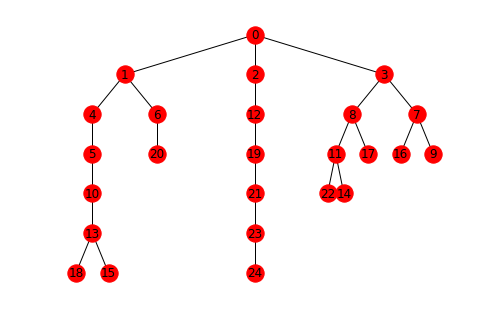

In [13]:
pos = hierarchy_pos(G,0) 
nx.draw(G,pos,with_labels=True)

plt.show()